In [13]:
!pip install prophet
!conda install -c conda-forge prophet -y

import pandas as pd
from prophet import Prophet   
import matplotlib.pyplot as plt
%matplotlib inline


     ---------------------------------------- 0.0/49.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/49.1 kB ? eta -:--:--
     --------------------------------- ------ 41.0/49.1 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 49.1/49.1 kB 827.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.8 MB/s eta 0:00:04
   ---------------------------------------- 0.1/13.3 MB 1.2 MB/s eta 0:00:12
    --------------------------------------- 0.2/13.3 MB 1.8 MB/s eta 0:00:08
    --------------------------------------- 0.2/13.3 MB 1.8 MB/s eta 0:00:08
    --------------------------------------- 0.3/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.4/13.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.4/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.6/13.3 MB 1.6 MB/s eta 0:00:08
   - -----


('Connection broken: IncompleteRead(5501716 bytes read, 29387956 more expected)', IncompleteRead(5501716 bytes read, 29387956 more expected))
('Connection broken: IncompleteRead(5501716 bytes read, 29387956 more expected)', IncompleteRead(5501716 bytes read, 29387956 more expected))



In [20]:
df=pd.read_excel(r"C:\Users\Manjari\OneDrive - instancia consultancy\Tajamul\Datasets\airline_passengers.csv.xlsx")
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


<Axes: >

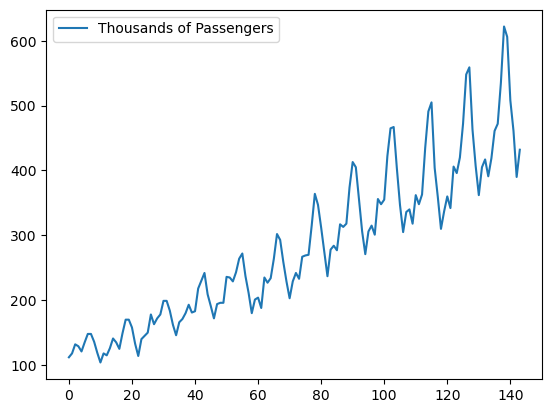

In [24]:
df.plot()

In [34]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [36]:
df.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [44]:
dir(Prophet)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 

In [46]:
# Initialize the Model
model=Prophet()

In [48]:
df.columns

Index(['ds', 'y'], dtype='object')

In [52]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [50]:
df.dropna(axis=0,inplace=True)
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [54]:
model.fit(df)

23:16:22 - cmdstanpy - INFO - Chain [1] start processing
23:16:24 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [58]:

df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [60]:

### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [62]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [64]:
prediction=model.predict(future_dates)

In [66]:

prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,53.117276,112.663941,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,50.585650,109.203916,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,84.018141,140.497580,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,78.465392,135.807124,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,82.237794,140.090415,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


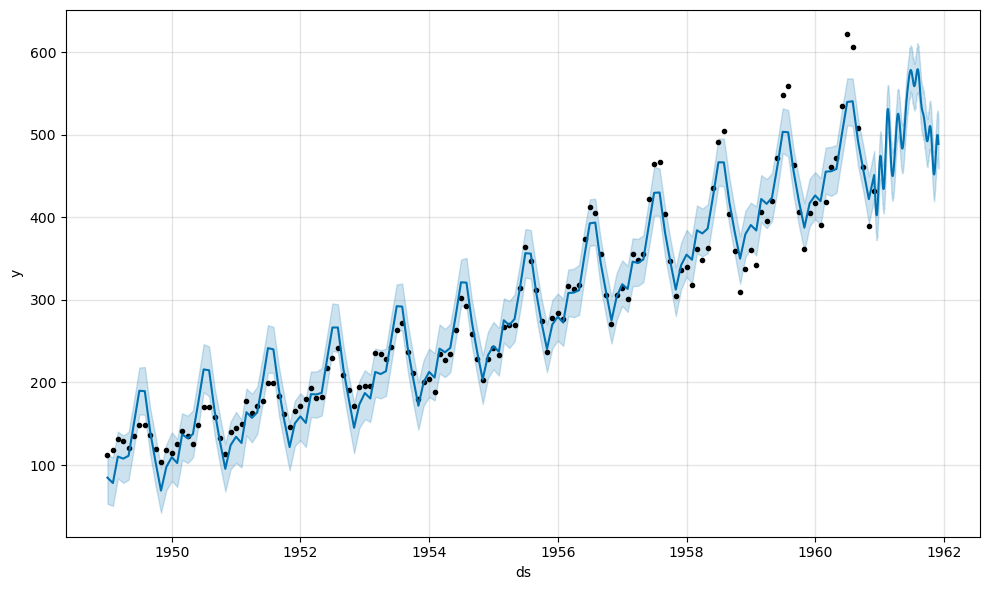

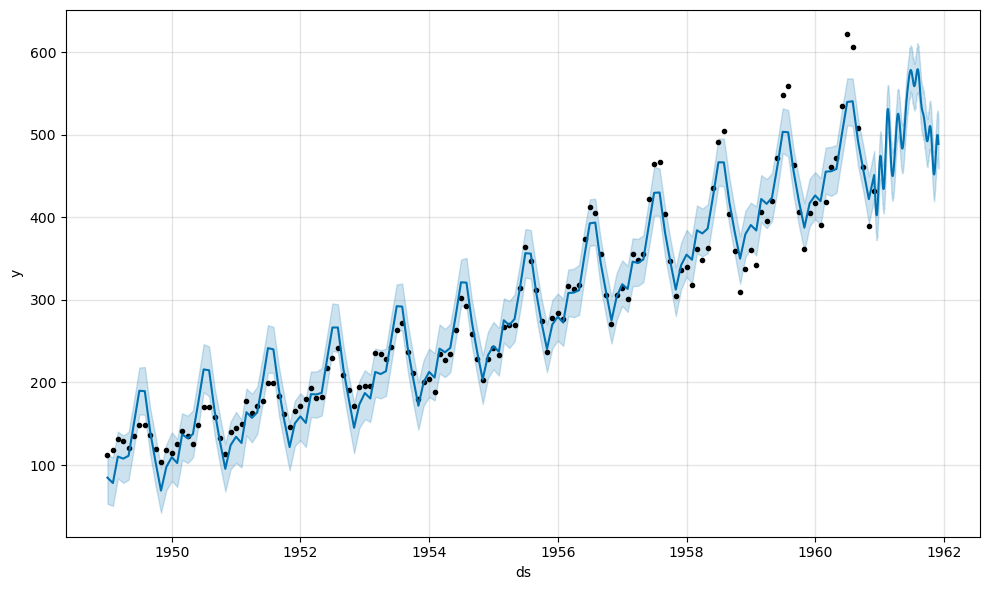

In [68]:

### plot the predicted projection
model.plot(prediction)

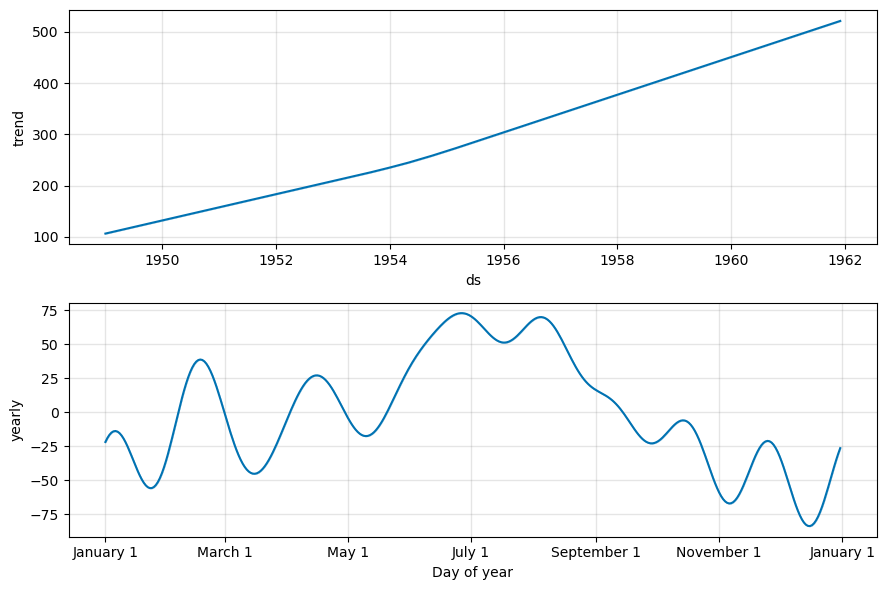

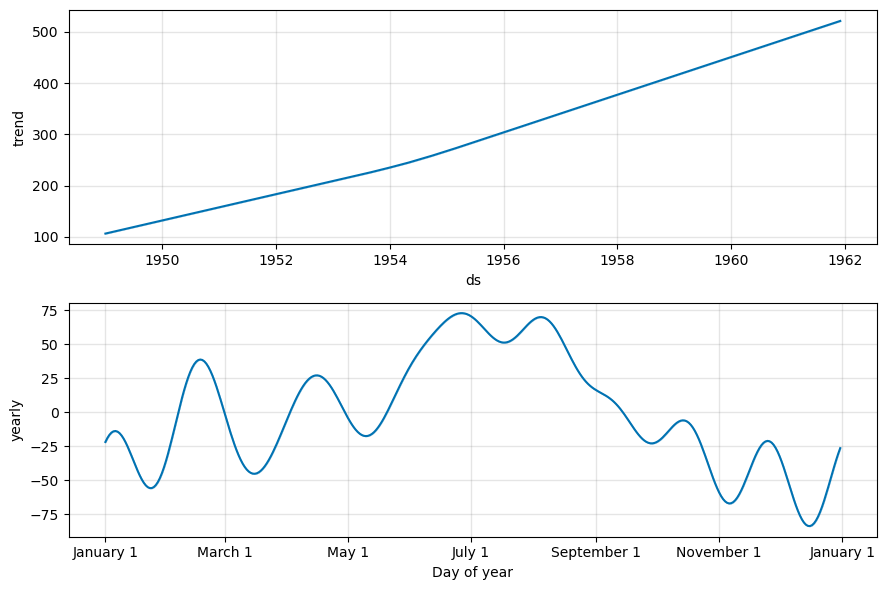

In [70]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [ ]:
'''Time Series Analysis

1960-1962
Cross Validation
1960-61---Train dataset
1961-62--Test dataset
1962-63---Validation

In [72]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]

23:17:40 - cmdstanpy - INFO - Chain [1] start processing
23:18:07 - cmdstanpy - INFO - Chain [1] done processing
23:18:08 - cmdstanpy - INFO - Chain [1] start processing
23:18:08 - cmdstanpy - INFO - Chain [1] done processing
23:18:08 - cmdstanpy - INFO - Chain [1] start processing
23:18:08 - cmdstanpy - INFO - Chain [1] done processing
23:18:08 - cmdstanpy - INFO - Chain [1] start processing
23:18:09 - cmdstanpy - INFO - Chain [1] done processing
23:18:09 - cmdstanpy - INFO - Chain [1] start processing
23:18:09 - cmdstanpy - INFO - Chain [1] done processing
23:18:09 - cmdstanpy - INFO - Chain [1] start processing
23:18:09 - cmdstanpy - INFO - Chain [1] done processing
23:18:09 - cmdstanpy - INFO - Chain [1] start processing
23:18:10 - cmdstanpy - INFO - Chain [1] done processing
23:18:10 - cmdstanpy - INFO - Chain [1] start processing
23:18:10 - cmdstanpy - INFO - Chain [1] done processing
23:18:10 - cmdstanpy - INFO - Chain [1] start processing
23:18:10 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.205061,156.961742,157.427335,150,1951-01-18
1,1951-03-01,169.726695,168.950974,170.442778,178,1951-01-18
2,1951-04-01,157.272915,155.817304,158.659095,163,1951-01-18
3,1951-05-01,143.304512,140.958229,145.551029,172,1951-01-18
4,1951-06-01,178.017955,174.846661,181.177132,178,1951-01-18


In [74]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1087.585276,32.978558,25.828241,0.078205,0.073741,0.079259,0.227273
1,42 days,1014.336159,31.848645,25.247395,0.076910,0.073741,0.077630,0.181818
2,46 days,909.313866,30.154832,24.670936,0.078810,0.079315,0.078584,0.136364
3,47 days,1044.683167,32.321559,26.845514,0.081984,0.085520,0.082145,0.136364
4,48 days,1034.252775,32.159801,26.300152,0.080102,0.085520,0.080328,0.181818


C:\Users\Manjari\anaconda3\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\Manjari\anaconda3\Lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


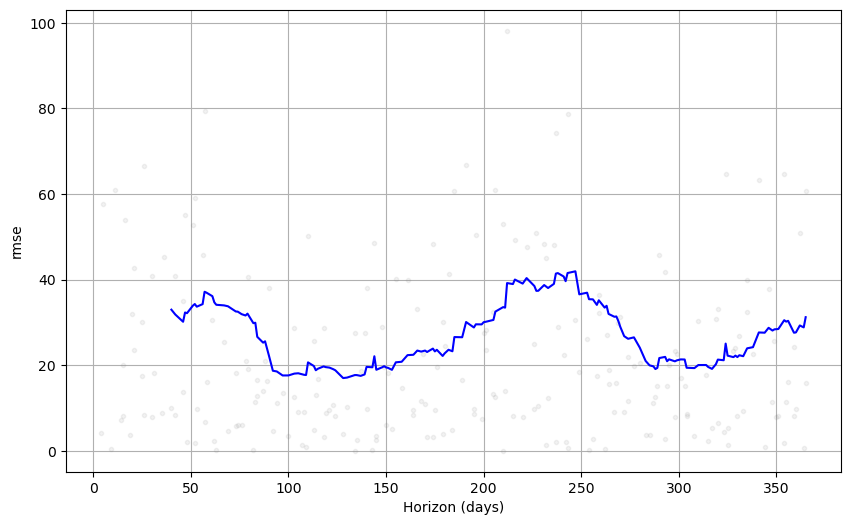

In [76]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')